In [1]:
import pandas as pd
import nltk
nltk.download('stopwords')
import PyPDF2 
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation as LDA
from pyLDAvis import sklearn as sklearn_lda
import re
import os
import numpy as np
from wordcloud import WordCloud
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline
from nltk import tokenize
import pyLDAvis

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Choice\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


#### Análise por cada palavra

In [ ]:
file_path = 'Artigos/Pasztor 2016 (1).pdf'

os.listdir('Artigos')
with open(file_path, mode='rb') as f:
    reader = PyPDF2.PdfFileReader(f)
    number_of_pages = reader.getNumPages()
    text = ''
    for i in range(number_of_pages - 5):
        page = reader.getPage(i)
        text += page.extractText()

In [ ]:
words = text.split() #testar com word_vectorizer

#Colocar todas as palavras minúsculas
words = [x.lower() for x in words]

#Retirar pontuações
words = [re.sub('[,\.!?()]', '', x) for x in words]

#Retirar Stopwords
stop_words = set(stopwords.words('english'))
words = [x for x in words if x not in stop_words]

#Retirar números
words = [x for x in words if not re.search("\d", x)]

In [ ]:
df = pd.DataFrame(words, columns = ['words'])

In [ ]:
count_data = count_vectorizer.fit_transform(df['words'])

In [ ]:
def plot_10_most_common_words(count_data, count_vectorizer):
    import matplotlib.pyplot as plt
    words = count_vectorizer.get_feature_names()
    total_counts = np.zeros(len(words))
    for t in count_data:
        total_counts+=t.toarray()[0]
    
    count_dict = (zip(words, total_counts))
    count_dict = sorted(count_dict, key=lambda x:x[1], reverse=True)[0:10]
    words = [w[0] for w in count_dict]
    counts = [w[1] for w in count_dict]
    x_pos = np.arange(len(words)) 
    
    plt.figure(2, figsize=(15, 15/1.6180))
    plt.subplot(title='10 most common words')
    sns.set_context("notebook", font_scale=1.25, rc={"lines.linewidth": 2.5})
    sns.barplot(x_pos, counts, palette='husl')
    plt.xticks(x_pos, words, rotation=90) 
    plt.xlabel('words')
    plt.ylabel('counts')
    plt.show()
# Initialise the count vectorizer with the English stop words
count_vectorizer = CountVectorizer(stop_words='english')
# Fit and transform the processed titles
count_data = count_vectorizer.fit_transform(df['words'])
# Visualise the 10 most common words
plot_10_most_common_words(count_data, count_vectorizer)

In [ ]:
from sklearn.decomposition import LatentDirichletAllocation as LDA
 
# Helper function
def print_topics(model, count_vectorizer, n_top_words):
    words = count_vectorizer.get_feature_names()
    for topic_idx, topic in enumerate(model.components_):
        print("\nTopic #%d:" % topic_idx)
        print(" ".join([words[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]]))
        
# Tweak the two parameters below
number_topics = 3
number_words = 5
# Create and fit the LDA model
lda = LDA(n_components=number_topics, n_jobs=-1)
lda.fit(count_data)
# Print the topics found by the LDA model
print("Topics found via LDA:")
print_topics(lda, count_vectorizer, number_words)

In [ ]:
LDAvis_prepared = sklearn_lda.prepare(lda, count_data, count_vectorizer)
pyLDAvis.save_html(LDAvis_prepared, 'ldavis_prepared_palavras'+'.html')

#### Análise por frases

In [28]:
file_path = 'Artigos/Pasztor 2016 (1).pdf'

os.listdir('Artigos')
with open(file_path, mode='rb') as f:
    reader = PyPDF2.PdfFileReader(f)
    number_of_pages = reader.getNumPages()
    text = ''
    for i in range(number_of_pages - 5):
        page = reader.getPage(i)
        text += page.extractText()

In [29]:
sent = tokenize.sent_tokenize(text)


#Tranformar em frases 
sent = [x.rstrip() for x in sent]

#Retirar \n\n
sent = [' '.join(x.split()) for x in sent]

In [30]:
df =  pd.DataFrame(sent, columns = ['sentences'])

In [31]:
#Colocar todas as palavras minúsculas
df['sentences'] = df['sentences'].apply(lambda x: [i.lower() for i in x.split()])

In [32]:
#Retirar Stopwords
stop_words = set(stopwords.words('english'))
df['sentences'] = df['sentences'].apply(lambda y: [x for x in y if x not in stop_words])

In [33]:
#Retirar Pontuação
df['sentences'] = df['sentences'].apply(lambda x: [re.sub(r'[^\w\s]','',s) for s in x])

In [40]:
df['sentences'] = df['sentences'].apply(lambda x: ' '.join(x))
count_vectorizer = CountVectorizer()
count_data = count_vectorizer.fit_transform(df['sentences'])

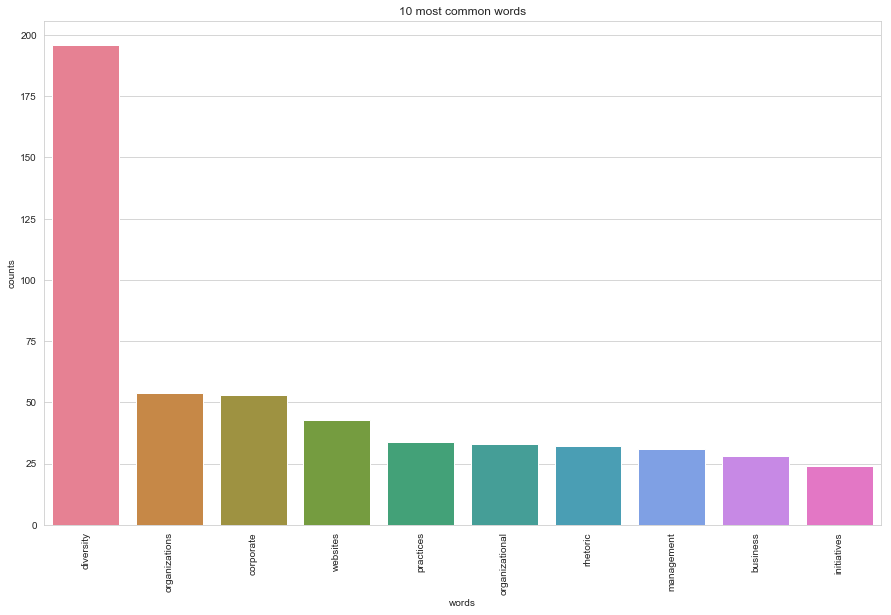

In [41]:
def plot_10_most_common_words(count_data, count_vectorizer):
    import matplotlib.pyplot as plt
    words = count_vectorizer.get_feature_names()
    total_counts = np.zeros(len(words))
    for t in count_data:
        total_counts+=t.toarray()[0]
    
    count_dict = (zip(words, total_counts))
    count_dict = sorted(count_dict, key=lambda x:x[1], reverse=True)[0:10]
    words = [w[0] for w in count_dict]
    counts = [w[1] for w in count_dict]
    x_pos = np.arange(len(words)) 
    
    plt.figure(2, figsize=(15, 15/1.6180))
    plt.subplot(title='10 most common words')
    sns.set_context("notebook", font_scale=1.25, rc={"lines.linewidth": 2.5})
    sns.barplot(x_pos, counts, palette='husl')
    plt.xticks(x_pos, words, rotation=90) 
    plt.xlabel('words')
    plt.ylabel('counts')
    plt.show()
# Initialise the count vectorizer with the English stop words
count_vectorizer = CountVectorizer(stop_words='english')
# Fit and transform the processed titles
count_data = count_vectorizer.fit_transform(df['sentences'])
# Visualise the 10 most common words
plot_10_most_common_words(count_data, count_vectorizer)

In [42]:
from sklearn.decomposition import LatentDirichletAllocation as LDA
 
# Helper function
def print_topics(model, count_vectorizer, n_top_words):
    words = count_vectorizer.get_feature_names()
    for topic_idx, topic in enumerate(model.components_):
        print("\nTopic #%d:" % topic_idx)
        print(" ".join([words[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]]))
        
# Tweak the two parameters below
number_topics = 3
number_words = 5
# Create and fit the LDA model
lda = LDA(n_components=number_topics, n_jobs=-1)
lda.fit(count_data)
# Print the topics found by the LDA model
print("Topics found via LDA:")
print_topics(lda, count_vectorizer, number_words)

Topics found via LDA:

Topic #0:
diversity companies practices social groups

Topic #1:
diversity organizations corporate organizational websites

Topic #2:
diversity corporate websites organizations business


In [43]:
LDAvis_prepared = sklearn_lda.prepare(lda, count_data, count_vectorizer)
pyLDAvis.save_html(LDAvis_prepared, 'ldavis_prepared_setences'+'.html')

of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.
 [_prepare.py:257]
